# Logistic Regression
Esse modelo, inicialmente, se trata de um modelo do **Classificação Binária**, em que é calculada uma probabilidade da amostra ser uma instância da classe "0" ou "1"
com base na regressão obtida. Esse modelo pode ser expressado matemáticamente pela seguinte expressão, que se trata de uma função sigmoidal:

$$p(X) = \frac{e^{\beta _0 + \beta _1 X}}{1 + e^{\beta _0 + \beta _1 X}}$$

Dessa forma, utilizando essa expressão é notória que estamos calculadno uma probabilidade, dado um conjunto de features, com garantia que $0 \leq p(x) \leq 1$

## Como estimar os coeficientes da regressão logistica ?
Basicamente, é possível pensar em duas maneiras principais. Aproveitando o conceito de minimizar o RSS, é possível, com base em certas manipulações algébricas, concluir que:

$$log\left( \frac{p(X)}{1 - p(X)}\right) = \beta_0 + \beta_1 X $$

Dessa forma, é possível verificar a semelhança entre esse modelo e o de regressão linear e otimizar com base na minimização do RSS também. Entretanto, o método preferido é um mais conhecido como *maximum likelihood*, chamado em português de método de *máxima verossimilhança*.

Vale lembrar que até o modelo em si somente calcula probabilidades, também chamada de *scores* para cada input recebido pelo modelo. Entretanto, a decisão de qual classe pertence, acaba se tratando basicamente de um *trigger* arbitrário escolhido pelo criador do modelo.

## Premissas assumidas
- Dados independentes entre si
- Assume que as variáveis de predição não devem ser muito correlacionadas entre si
- Depende muito do tamanho da base de treino, é preciso que seja grande para performar bem

A regressão logística não modela diretamente a probabilidade de um evento ocorrer, mas sim o **logaritmo das chances** (log odds) desse evento.
As chances representam a razão entre a probabilidade do evento ocorrer e seu complementar, e o *log odds* transforma essa razão em uma **escala linear**.

Dessa forma, o modelo assume os **log odds** são uma **combinação linear das variáveis independentes**, ou seja:
$$log\left( \frac{p}{1 - p}\right) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n$$

Ou seja, ela não funciona bem se a relação entre as variáveis preditoras e o *target* não for aproximadamente linear nos **log odds**.

## Multinomial Logistic Regression
Em essência é a mesma coisa da regressão logística mas com múltiplas variáveis independentes explicativas, ela é útil, por exemplo, para contesto de multi-classificação. Entretanto, no contexto de multi-classificação, a essência é basicamente utilizar regressão logística múltiplas vezes. Por exemplo, digamos que você precise avaliar se é $y \in \{"Azul", "Verde", "Preto"\}$. É possível dividir primeiro entre verificar se $y \in \{"Azul", "Verde"\}$  ou $y = "Preto"$ e depois calcular separadamente para dividir entre "Azul" e "Verde".

c:\Users\Lucas\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Primeiras 10 linhas dos dados:
   Feature_1  Feature_2  Feature_3  Feature_4  Target
0  -2.439926  -1.371106  -0.025787  -0.102379       0
1  -0.366951   1.380114   0.583490   0.443968       1
2  -1.321133  -0.680427   0.749495  -0.281137       1
3  -0.330055   1.443556   0.508346   1.019528       1
4  -1.211829  -2.021848   0.143790   0.501954       0
5   1.109033   1.038307  -3.296685   2.172071       1
6  -1.814702  -2.304453   1.310537  -2.536949       1
7   1.550601   1.299203  -1.878130   1.748988       1
8   0.117978  -0.424860  -1.337395  -1.414848       0
9   0.695738   0.081384   2.264526   2.339432       0

Shape dos dados: (1000, 5)

Distribuição das classes:
1    501
0    499
Name: Target, dtype: int64

Tamanho do conjunto de treino: (800, 4)
Tamanho do conjunto de teste: (200, 4)

Acurácia do modelo: 0.7650

Matriz de Confusão:
[[83 17]
 [30 70]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.73      0.83      0.78

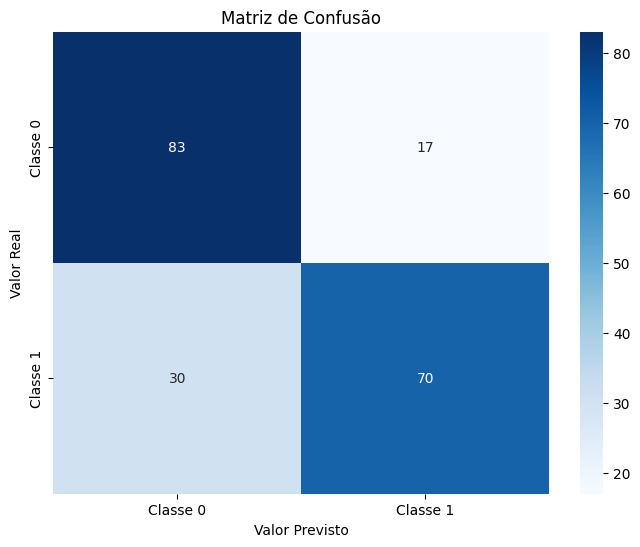

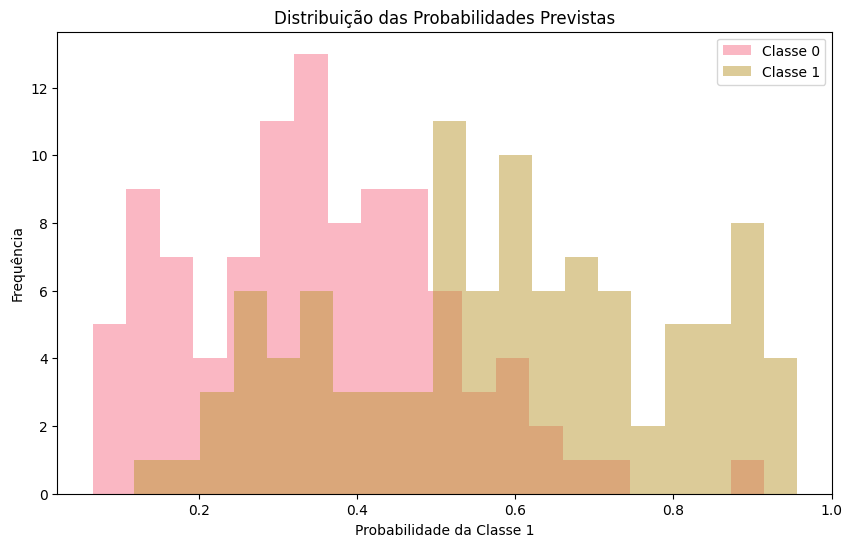


Exemplo de previsão para novos dados:
Exemplo 1:
  Previsão: Classe 1
  Probabilidades: [Classe 0: 0.3417, Classe 1: 0.6583]

Exemplo 2:
  Previsão: Classe 1
  Probabilidades: [Classe 0: 0.2389, Classe 1: 0.7611]

Modelo salvo como 'modelo_regressao_logistica.pkl'


In [1]:
# Importar bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import make_classification

# Configurar estilo dos gráficos
plt.style.use('default')
sns.set_palette("husl")

# Gerar dados de exemplo
X, y = make_classification(
    n_samples=1000,           # 1000 amostras
    n_features=4,            # 4 características
    n_informative=4,         # Todas as características são informativas
    n_redundant=0,           # Sem características redundantes
    n_classes=2,             # Classificação binária
    random_state=42          # Semente para reproducibilidade
)

# Criar DataFrame para melhor visualização
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4'])
df['Target'] = y

# Visualizar as primeiras linhas dos dados
print("Primeiras 10 linhas dos dados:")
print(df.head(10))
print(f"\nShape dos dados: {df.shape}")
print(f"\nDistribuição das classes:\n{df['Target'].value_counts()}")

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,           # 20% para teste
    random_state=42,         # Semente para reproducibilidade
    stratify=y               # Manter proporção das classes
)

print(f"\nTamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")

# Criar e treinar o modelo de regressão logística
model = LogisticRegression(
    random_state=42,         # Semente para reproducibilidade
    max_iter=1000            # Número máximo de iterações
)

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilidades da classe positiva

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAcurácia do modelo: {accuracy:.4f}")

# Matriz de confusão
print("\nMatriz de Confusão:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Coeficientes do modelo
print("Coeficientes do modelo:")
print(f"Intercept (bias): {model.intercept_[0]:.4f}")
for i, coef in enumerate(model.coef_[0]):
    print(f"Coeficiente da Feature_{i+1}: {coef:.4f}")

# Visualizar algumas previsões
results_df = pd.DataFrame({
    'Real': y_test,
    'Previsto': y_pred,
    'Probabilidade_Classe_1': y_pred_proba
})

print("\nPrimeiras 10 previsões:")
print(results_df.head(10))

# Gráfico da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.title('Matriz de Confusão')
plt.ylabel('Valor Real')
plt.xlabel('Valor Previsto')
plt.show()

# Gráfico de distribuição das probabilidades
plt.figure(figsize=(10, 6))
plt.hist(y_pred_proba[y_test == 0], alpha=0.5, label='Classe 0', bins=20)
plt.hist(y_pred_proba[y_test == 1], alpha=0.5, label='Classe 1', bins=20)
plt.title('Distribuição das Probabilidades Previstas')
plt.xlabel('Probabilidade da Classe 1')
plt.ylabel('Frequência')
plt.legend()
plt.show()

# Exemplo de previsão para novos dados
print("\nExemplo de previsão para novos dados:")
novos_dados = np.array([[1.2, -0.5, 0.8, 1.0],   # Exemplo 1
                       [-0.3, 1.8, -1.2, 0.5]])  # Exemplo 2

previsoes = model.predict(novos_dados)
probabilidades = model.predict_proba(novos_dados)

for i, (previsao, prob) in enumerate(zip(previsoes, probabilidades)):
    print(f"Exemplo {i+1}:")
    print(f"  Previsão: Classe {previsao}")
    print(f"  Probabilidades: [Classe 0: {prob[0]:.4f}, Classe 1: {prob[1]:.4f}]")
    print()

# Salvar o modelo (opcional)
import joblib
joblib.dump(model, 'modelo_regressao_logistica.pkl')
print("Modelo salvo como 'modelo_regressao_logistica.pkl'")

## LDA
Basicamente é um algoritmo que gera um eixo que tenta aumentar a separação entre instâncias de classes diferentes. LDA é parecido com PCA mas ele foca
em **maximizar a separabilidade entre as categorias/classes conhecidas**. Por exemplo, no caso de um gráfico 2D, o LDA gera uma reta que, ao projetar esses pontos para essa reta,
é possível ter reta que maximiza a separabilidade entre as categorias.

### Como o LDA funciona? Como ele cria o novo eixo?
Ele é criado com base em dois critérios.

1) Maximização da distância entre as médias das instâncias de categorias diferentes.
2) Minimizar a variação, que chamam de $s^2$ em cada categoria

Isso é traduzido matematicamente, supondo que temos 2 categorias, por:

$$\frac{(\mu_A - \mu_B)^2}{s_A^2 + s_B^2} $$

O esperado é que $(\mu_A - \mu_B)^2$ seja o **maior possível** e que $(s_A^2 + s_B^2)$ seja o **menor possível**.

### E como funciona o LDA para quando temos 3 categorias?
Nesse caso, duas coisas mudam, mas só um pouco:

1. A forma como é medida a distância entre as médias:
    - É primeiro encontrado um ponto que seja **central** a todos os dados;
    - Depois, as distâncias são calculadas entre a média de cada categoria e o **ponto central** e também minimizando a **variância** pela equação: $$\frac{d_A^2 + d_B^2 + d_C^2}{s_A^2 + s_B^2 + s_C^2}$$
2. A segunda diferença é que são criados 2 novos eixos para separar os dados.